### Task A


In [73]:
#numeric
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

#### Credit Card Data

In [74]:
df = pd.read_excel('default of credit card clients.xls')
#dar nomes às colunas
df.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
              'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

df = df.drop(['ID'])

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [75]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
y=df.as_matrix(columns=[df.columns[0]])

# features

X=df.as_matrix(columns=df.columns[1:]) 
print(X.shape)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

(30000, 23)


In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print('X_Train:', X_train_std)
print('\nX_Test:', X_train_std)

X_Train: [[ 0.81779323  0.18719091  0.85805828 ..., -0.31626876 -0.29736488
  -0.53668192]
 [-1.22280299  0.18719091 -1.05969649 ..., -0.22965629 -0.18356692
  -0.53668192]
 [ 0.81779323  2.71924188  0.85805828 ...,  0.25861327 -0.09639769
  -0.53668192]
 ..., 
 [ 0.81779323  1.4532164  -1.05969649 ..., -0.31626876 -0.01286999
  -0.53668192]
 [ 0.81779323  1.4532164  -1.05969649 ..., -0.25015237 -0.26891539
  -0.53668192]
 [ 0.81779323 -1.07883457  0.85805828 ..., -0.1708127  -0.18356692
  -0.53668192]]

X_Test: [[ 0.81779323  0.18719091  0.85805828 ..., -0.31626876 -0.29736488
  -0.53668192]
 [-1.22280299  0.18719091 -1.05969649 ..., -0.22965629 -0.18356692
  -0.53668192]
 [ 0.81779323  2.71924188  0.85805828 ...,  0.25861327 -0.09639769
  -0.53668192]
 ..., 
 [ 0.81779323  1.4532164  -1.05969649 ..., -0.31626876 -0.01286999
  -0.53668192]
 [ 0.81779323  1.4532164  -1.05969649 ..., -0.25015237 -0.26891539
  -0.53668192]
 [ 0.81779323 -1.07883457  0.85805828 ..., -0.1708127  -0.1835669

In [89]:
from sklearn.decomposition import PCA 
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.28244891,  0.16777631,  0.07058953,  0.0649071 ,  0.04485708,
        0.04136675,  0.04030509,  0.03791644,  0.03726454,  0.03708158,
        0.03222206,  0.03070471,  0.02768002,  0.0244748 ,  0.01704142,
        0.01138469,  0.01099061,  0.00823332,  0.00571683,  0.00310724,
        0.00179339,  0.00110693,  0.00103065])

[ 0.28244891  0.45022522  0.52081475  0.58572185  0.63057893  0.67194569
  0.71225077  0.75016721  0.78743175  0.82451333  0.85673539  0.8874401
  0.91512011  0.93959491  0.95663633  0.96802102  0.97901164  0.98724496
  0.99296179  0.99606903  0.99786241  0.99896935  1.        ] 
 [ 0.28244891  0.16777631  0.07058953  0.0649071   0.04485708  0.04136675
  0.04030509  0.03791644  0.03726454  0.03708158  0.03222206  0.03070471
  0.02768002  0.0244748   0.01704142  0.01138469  0.01099061  0.00823332
  0.00571683  0.00310724  0.00179339  0.00110693  0.00103065]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

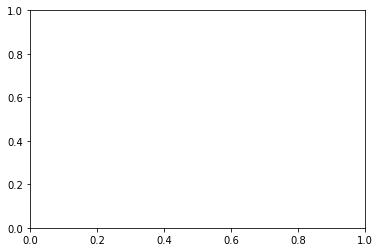

In [96]:
print(np.cumsum(pca.explained_variance_ratio_), "\n", pca.explained_variance_ratio_)

plt.bar(range(30), pca.explained_variance_ratio_, alpha=0.5, align='edge') 
plt.step(range(30), np.cumsum(pca.explained_variance_ratio_), where='mid') 
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()
 
 

#### Adult Dataset